In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cd ~

/Users/ae-j


In [3]:
cd Documents/GA/PL/project_group/lancelot_group_project

/Users/ae-j/Documents/GA/PL/project_group/lancelot_group_project


In [4]:
df = pd.read_csv('./data/df_final.csv')

## Corr Map

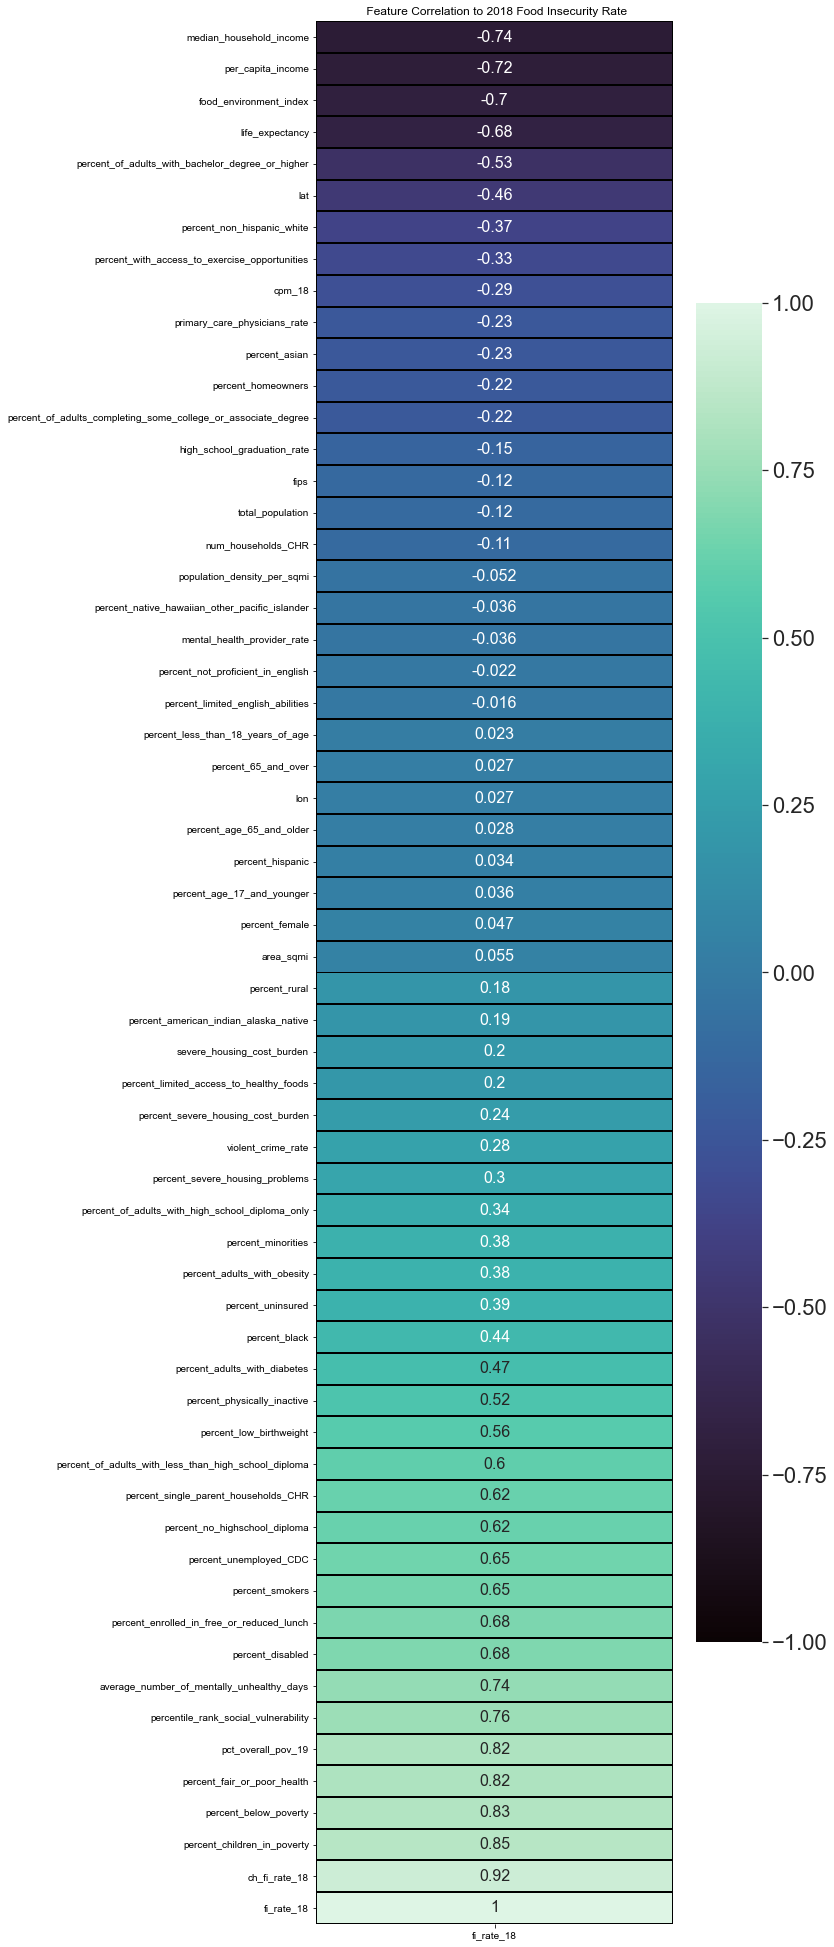

In [5]:
plt.figure(figsize=(8,35))
ax = plt.axes()
ax.set_title(' Feature Correlation to 2018 Food Insecurity Rate')
corr = df.corr()[['fi_rate_18']]
sns.set(font_scale=2)
sns.heatmap(corr.sort_values(by = 'fi_rate_18', ascending = True), annot=True, cmap='mako', vmin = -1, vmax = 1, linecolor= 'black', linewidth = 1,annot_kws={"fontsize":16});

In [6]:
df.filter(like='percent', axis=1).shape

(3140, 39)

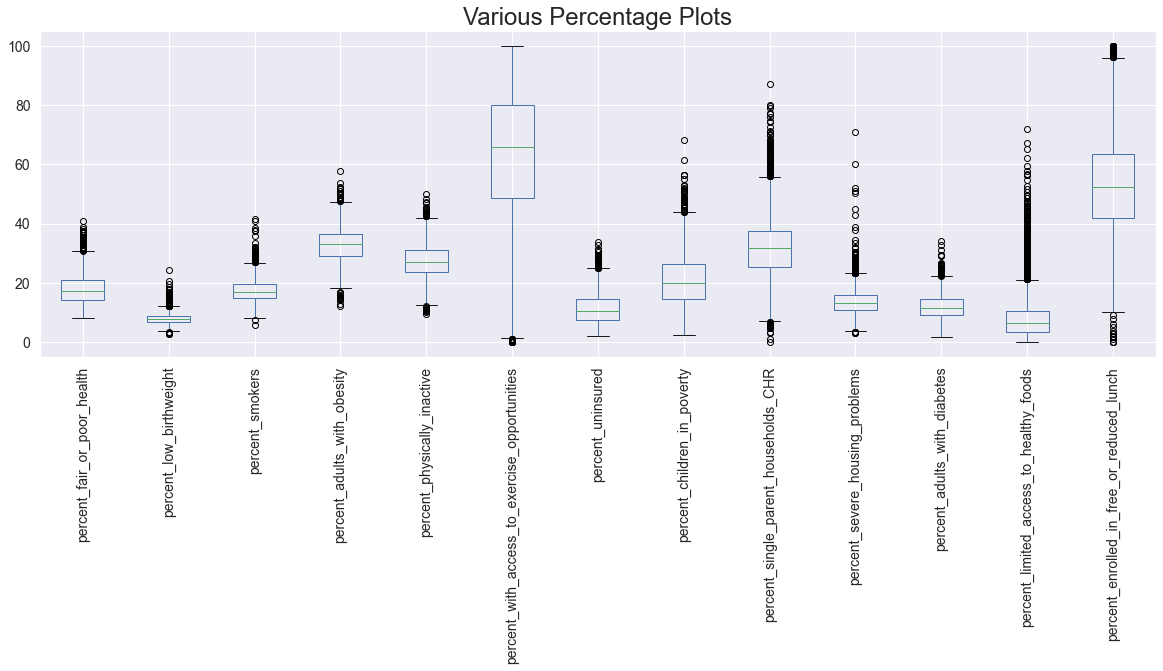

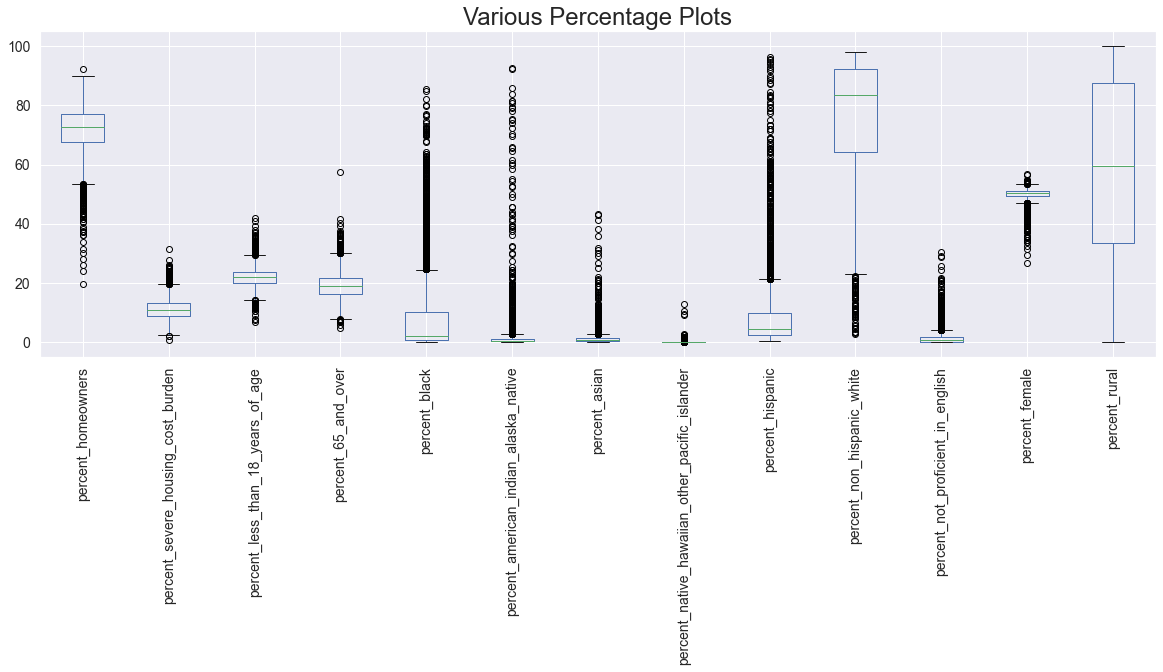

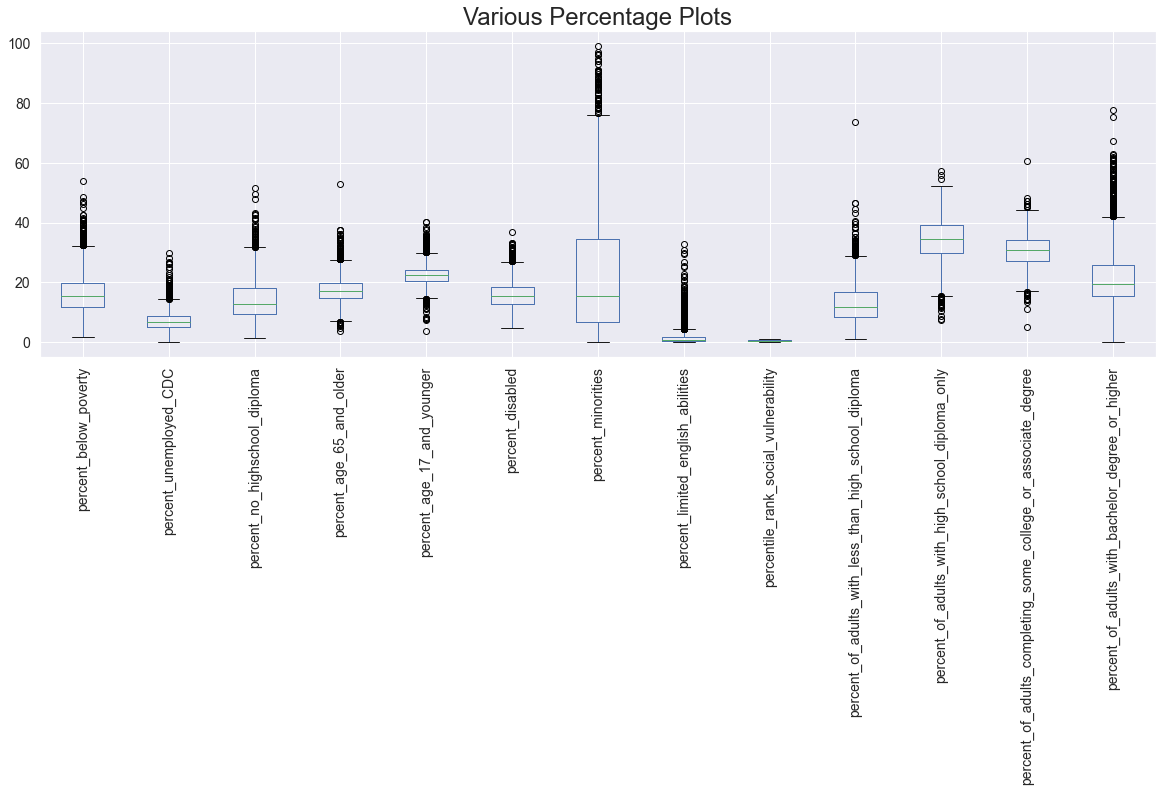

In [7]:
df[df.filter(like='percent', axis=1).columns[0:13]
       ].plot(kind= 'box', figsize=(20,6), rot = 90,fontsize = 14, title= 'Various Percentage Plots');
df[df.filter(like='percent', axis=1).columns[13:26]
       ].plot(kind= 'box', figsize=(20,6), rot = 90,fontsize = 14, title= 'Various Percentage Plots');
df[df.filter(like='percent', axis=1).columns[26:39]
       ].plot(kind= 'box', figsize=(20,6), rot = 90,fontsize = 14, title= 'Various Percentage Plots');

In [8]:
df.filter(like='rate', axis=1).shape

(3140, 6)

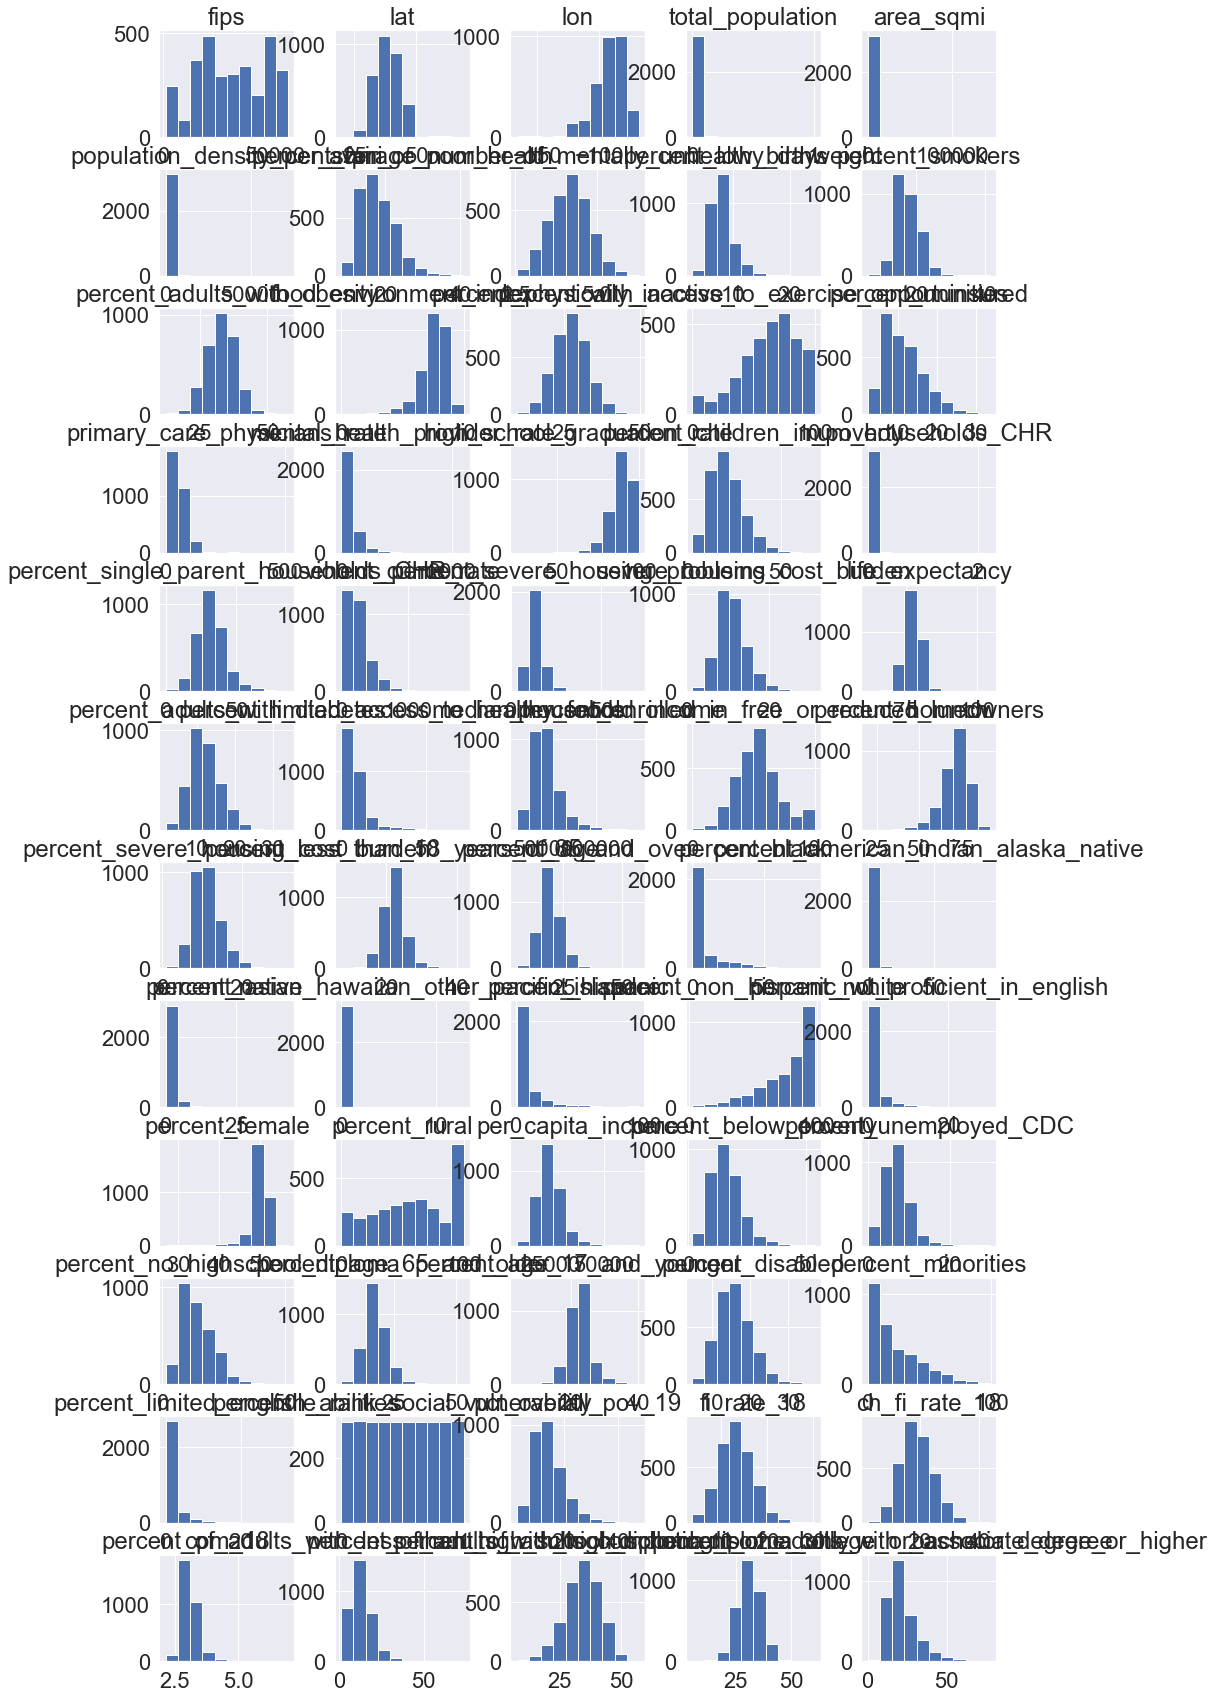

In [9]:
df.hist(figsize=(15, 30), layout=(12, 5));

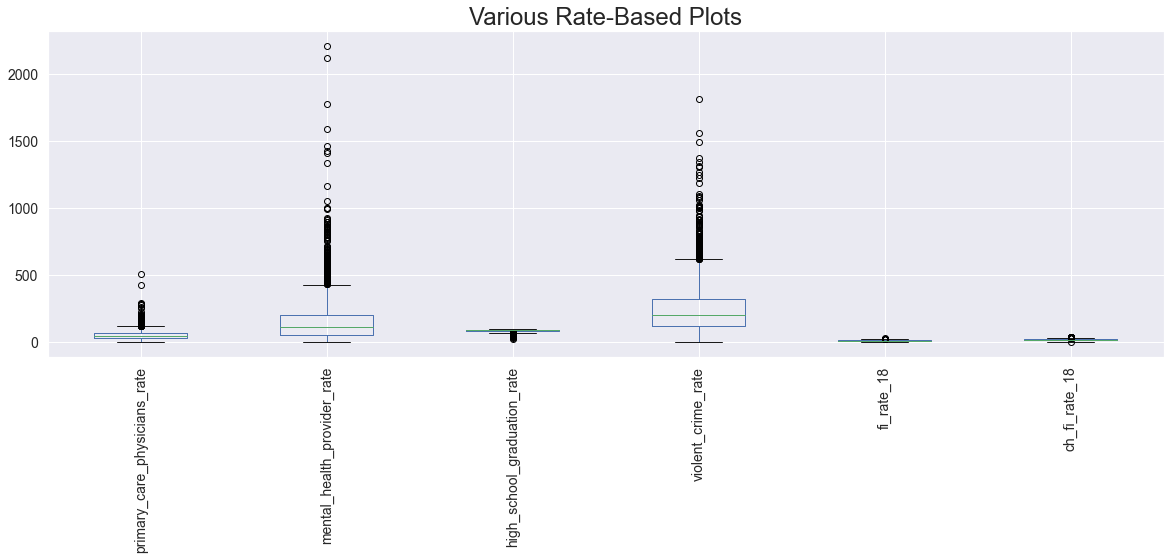

In [10]:
df[df.filter(like='rate', axis=1).columns[0:6]
       ].plot(kind= 'box', figsize=(20,6), rot = 90,fontsize = 14, title= 'Various Rate-Based Plots');

## Food Insecurity